In [1]:
from skimage import color, io, measure, img_as_ubyte
from skimage.measure import profile_line
from skimage.transform import rescale, resize
import matplotlib.pyplot as plt
import numpy as np
import pydicom as dicom

In [2]:
# Directory containing data and images
in_dir = "data/metacarpals.png"


# Read the image.
# Here the directory and the image name is concatenated
# by "+" to give the full path to the image.
im_org = io.imread(in_dir)

In [3]:
#image dimension
print(im_org.shape)

(512, 512)


In [4]:
print(im_org.dtype)

uint8


*Display the image and try to use the simple viewer tools like the **zoom** tool to inspect the finger bones. You can see the pixel values at a given pixel position (in x, y coordinates) in the upper right corner. Where do you see the highest and lowest pixel values?*

Text(0.5, 1.0, 'Metacarpal image')

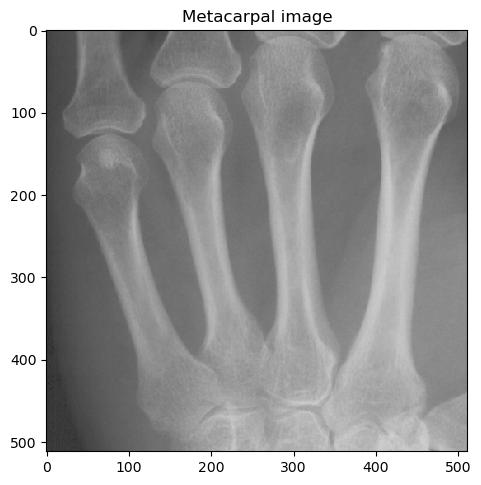

In [5]:
io.imshow(im_org)
plt.title('Metacarpal image')


Therefore, the highest pixel values (brightness) in the X-ray image are generally associated with the densest structures, such as bones. The lowest pixel values (darker areas) are usually associated with less dense tissues, like muscles and skin.

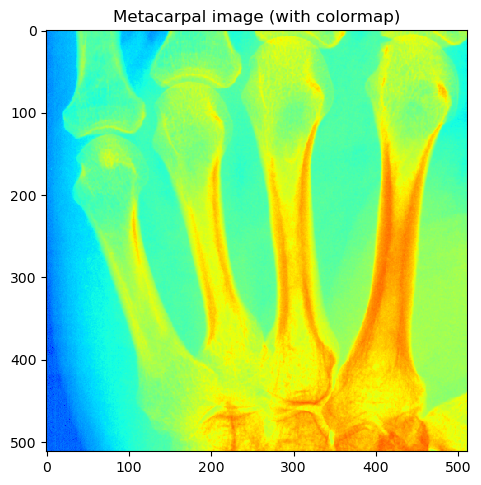

In [6]:
io.imshow(im_org, cmap="jet")
plt.title('Metacarpal image (with colormap)')
io.show()

## Grey scale scaling

Sometimes, there is a lack of contrast in an image or the brightness levels are not optimals. It possible to scale the way the image is visualized, by forcing a pixel value range to use the full gray scale range (from white to black).

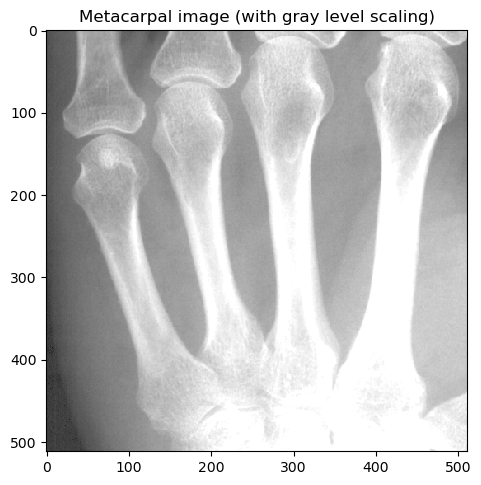

In [7]:
io.imshow(im_org, vmin=20, vmax=170)
plt.title('Metacarpal image (with gray level scaling)')
io.show()

vmin: The minimum intensity value for mapping to the colormap. Pixels with values below this minimum will be mapped to the minimum color in the colormap.

vmax: The maximum intensity value for mapping to the colormap. Pixels with values above this maximum will be mapped to the maximum color in the colormap.

**Exercise 7:** *Try to find a way to automatically scale the visualization, so the pixel with the lowest value in the image is shown as black and the pixel with the highest value in the image is shown as white.*

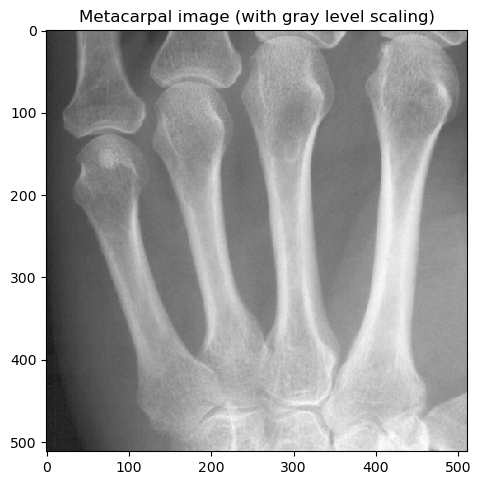

In [8]:
io.imshow(im_org, vmin=np.min(im_org), vmax=np.max(im_org))
plt.title('Metacarpal image (with gray level scaling)')
io.show()

**Exercise 8:** *Compute and visualise the histogram of the image:*

[ 42  45  50 ... 191 190 189]


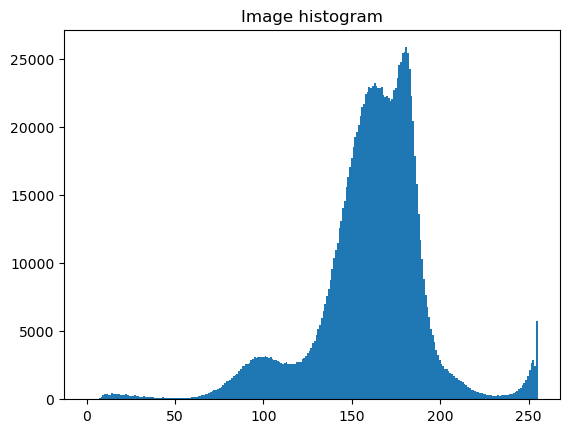

In [47]:
print(im_org.ravel())
plt.hist(im_org.ravel(), bins=256)
plt.title('Image histogram')
io.show()

Since the histogram functions takes 1D arrays as input, the function `ravel` is called to convert the image into a 1D array.

In a grayscale image, where pixel values typically range from 0 to 255, setting bins=256 in a histogram means that you want to create a histogram with 256 bins, each corresponding to one possible pixel value

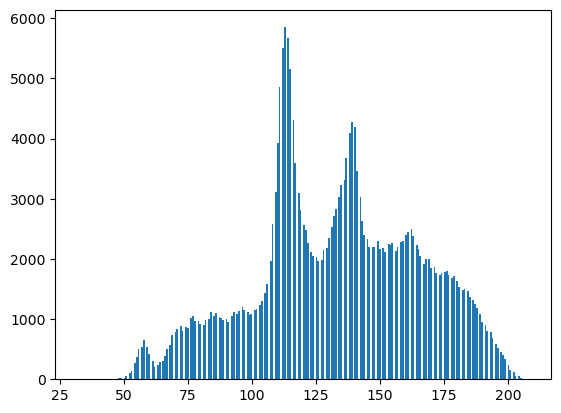

In [10]:
#storing bins
h = plt.hist(im_org.ravel(), bins=256)

In [52]:
#The value of a given bin can be found by:
bin_no = 100
count = h[0][bin_no]
print(f"There are {count} pixel values in bin {bin_no}")

There are 1147.0 pixel values in bin 100


Here `h` is a list of tuples, where in each tuple the first element is the bin count and the second is the bin edge. So the bin edges can for example be found by:

In [12]:
bin_left = h[1][bin_no]
bin_right = h[1][bin_no + 1]
print(f"Bin edges: {bin_left} to {bin_right}")

Bin edges: 100.75 to 101.4375


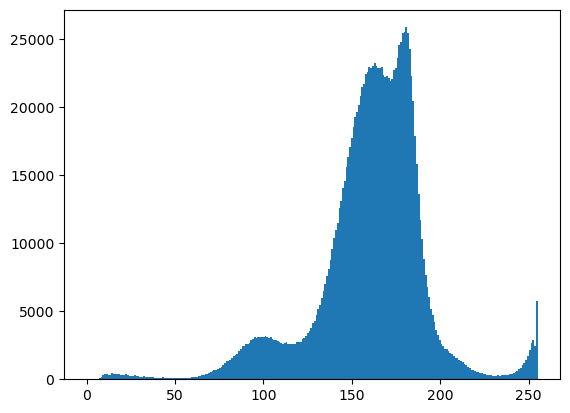

In [56]:
y, x, _ = plt.hist(im_org.ravel(), bins=256)

**Exercise 9:** *Use the histogram function to find the most common range of intensities? (hint: you can use the list functions `max` and `argmax`).*

In [14]:
most_common_intensity = np.argmax(y)
bin_max= np.max(y)
bin_left = h[1][most_common_intensity]
bin_right = h[1][most_common_intensity + 1]
print(f"The most common range of intensities: {bin_left} to {bin_right}")
print(f"The max number of pixel in a bin is {bin_max}")

The most common range of intensities: 112.4375 to 113.125
The max number of pixel in a bin is 5848.0


## Pixel values and image coordinate systems

We are using **scikit-image** and the image is represented using a **NumPy** array. Therefore, a two-dimensional image is indexed by rows and columns (abbreviated to **(row, col)** or **(r, c)**)  with **(0, 0)** at the top-left corner.


In [15]:
r = 100
c = 50
im_val = im_org[r, c]
print(f"The pixel value at (r,c) = ({r}, {c}) is: {im_val}")

The pixel value at (r,c) = (100, 50) is: 108


**Exercise 10:** *What is the pixel value at (r, c) = (110, 90) ?*

In [16]:
print(f"The pixel value at (110,90) is: {im_org[110,90]}")

The pixel value at (110,90) is: 120


**Exercise 11:** *What does this operation do?*

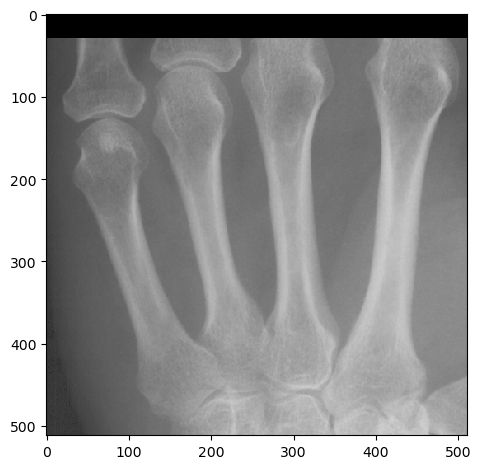

In [17]:
im_org[:30] = 0
io.imshow(im_org)
io.show()

A **mask** is a binary image of the same size as the original image, where the values are either 0 or 1 (or True/False). Here a mask is created from the original image. 


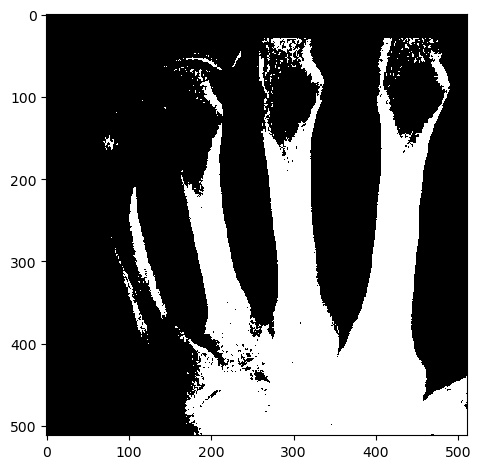

In [18]:
mask = im_org > 150
io.imshow(mask)
io.show()

**Exercise 12:** *Where are the values 1 and where are they 0?* 
The values 1 are where the pixel value is > 150, otherwise is 0.

**Exercise 13:** *What does this piece of code do?*
Where the pixel is >150, il valore viene posto a 255.

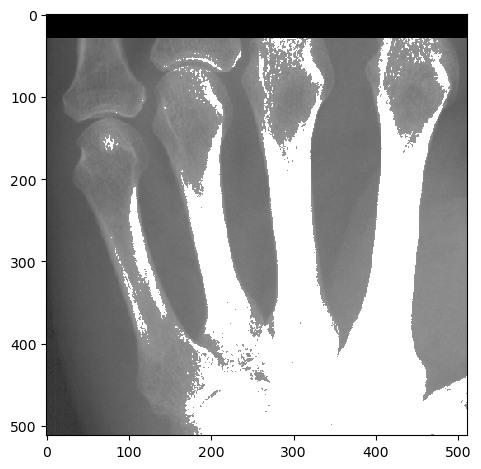

In [19]:
im_org[mask] = 255
io.imshow(im_org)
io.show()

## Color images

In a color image, each pixel is defined using three values: R (red), G (green), and B
(blue).

An example image **ardeche.jpg** is provided.

**Exercise 14:** *Read the image and print the image dimensions and its pixel type. How many rows and columns do the image have?*

uint8
(600, 800, 3)
The image has 600 rows and 800 columns.


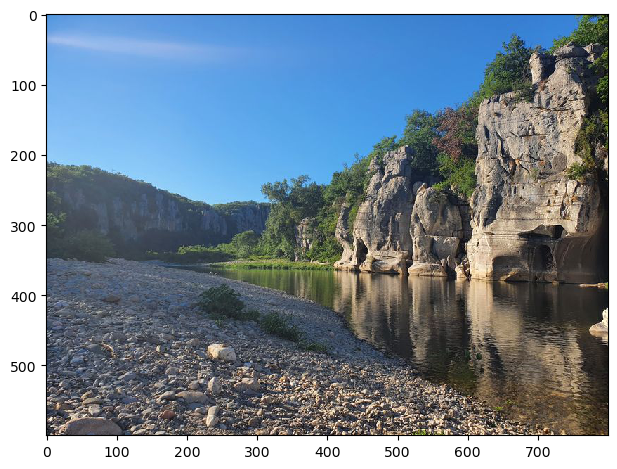

In [20]:
colored_image= io.imread("data/ardeche.jpg")
io.imshow(colored_image)
print(colored_image.dtype)
print(colored_image.shape)
rows, columns, depth = colored_image.shape
print(f"The image has {rows} rows and {columns} columns.")

**Exercise 15:** *What are the (R, G, B) pixel values at (r, c) = (110, 90)?*


In [58]:
r= 110
c=90
im_val= colored_image[r,c,]
print(f"The pixels value at (110,90) is: {im_val}" )
#A pixel can be assigned an (R, G, B) value by for example:
colored_image[r,c]= [255, 0, 0]

The pixels value at (110,90) is: [255   0   0]


**Exercise 16:** *Try to use NumPy slicing to color the upper half of the photo green.*

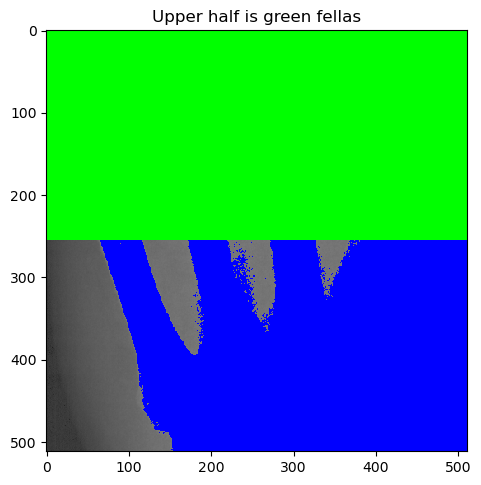

In [60]:
#Number of rows
rows = colored_image.shape[0]
splitted_rows = int(rows / 2)
colored_image[:splitted_rows, :]= [0, 255, 0]
io.imshow(colored_image)
plt.title('Upper half is green fellas')
io.show()

## Working with your own image

It is now time to work with one of your own images. It is assumed that
you know how to either save an image from a digital camera on the disk
or download an image. Copy the image to your relevant Python folder.


**Exercise 17:** *Start by reading the image and examine the size of it.*

(647, 800, 3)


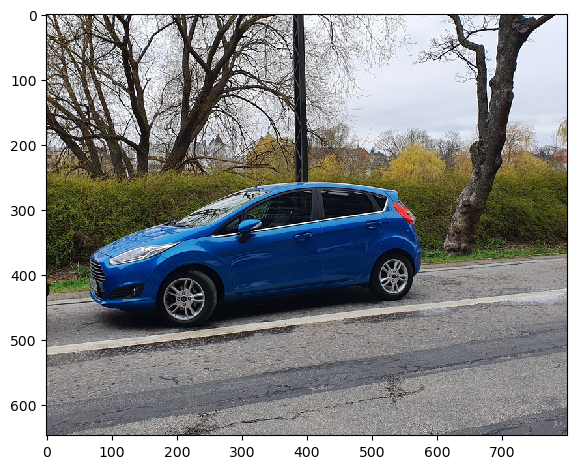

In [23]:
my_image= io.imread('data/car.png')
io.imshow(my_image)
print(my_image.shape)

We can rescale the image, so it becomes smaller and easier to work with:


In [24]:
image_rescaled = rescale(my_image, 0.25, anti_aliasing=True,channel_axis=2)

Here we selected a scale factor of 0.25. We also specify, that we have more than one channel (since it is RGB) and that the channels are kept in the third dimension of the NumPy array. The rescale function has this side effect, that it changes the type of the pixel values. Anti-aliasing is applied to improve the quality of the resized image. Channel_axis=2: This parameter specifies the axis along which the image channels are arranged. In a typical RGB image, channels are often represented along the third axis (axis index 2). This parameter ensures that the rescaling operation is applied independently to each channel.

**Exercise 18:** *What is the type of the pixels after rescaling? Try to show the image and inspect the pixel values. Are they still in the range of [0, 255]?*


float64


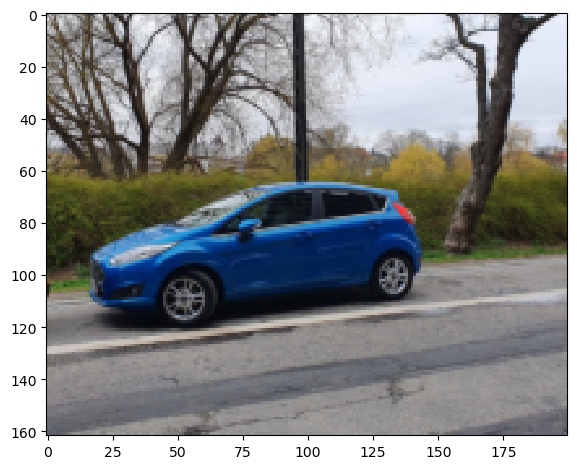

In [25]:
#Rescaled image
io.imshow(image_rescaled)
print(image_rescaled.dtype)

The function `rescale` scales the height and the width of the image with the same factor. The `resize` functions can scale the height and width of the image with different scales. For example:

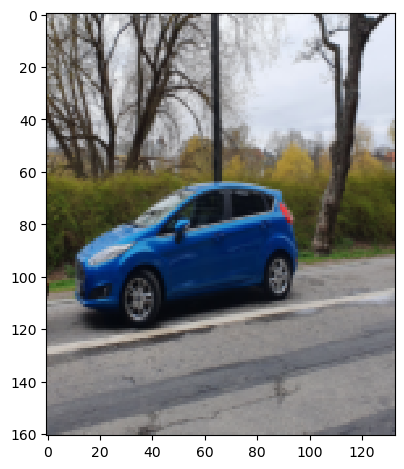

In [26]:
image_resized = resize(my_image, (my_image.shape[0] // 4, my_image.shape[1] // 6), 
                       anti_aliasing=True)
io.imshow(image_resized)

**Exercise 19:** *Try to find a way to automatically scale your image so the resulting width (number of columns) is always equal to 400, no matter the size of the input image?*

To be able to work with the image, it can be transformed into a
gray-level image:

In [27]:
im_gray = color.rgb2gray(my_image)
im_byte = img_as_ubyte(im_gray)

We are forcing the pixel type back into **unsigned bytes** using the `img_as_ubyte` function, since the `rgb2gray` functions returns the pixel values as floating point numbers.

**Exercise 19:** *Compute and show the histogram of you own image.*

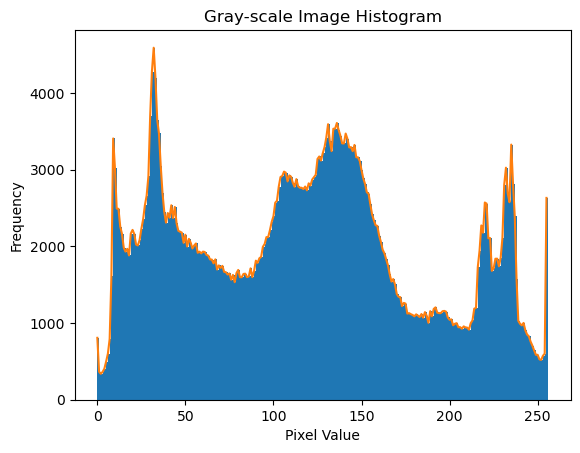

In [28]:
hist, bins, _ = plt.hist(im_byte.ravel(), bins=256, range=[0, 256])
plt.plot(hist)
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.title('Gray-scale Image Histogram')
plt.show()


**Exercise 20:** *Take an image that is very dark and another very light image. Compute and visualise the histograms for the two images. Explain the difference between the two.*

(3648, 5472, 3)
(3648, 5472)
(3648, 5472)


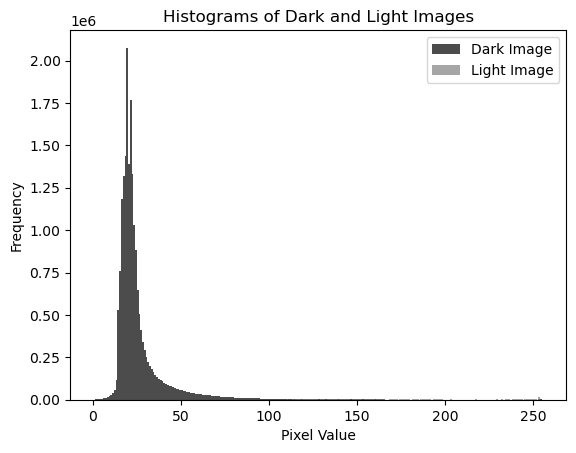

In [64]:
dark_image = io.imread('data/dark2.jpg')

# Load a very light image
light_image = io.imread('data/light.jpg')

# Convert to grayscale
dark_gray = color.rgb2gray(dark_image)
light_gray = color.rgb2gray(light_image)

# Convert to unsigned byte
dark_byte = img_as_ubyte(dark_gray)
light_byte = img_as_ubyte(light_gray)


# Compute histograms
hist_dark, bins_dark, _ = plt.hist(dark_byte.flatten(), bins=256, range=[0, 256], color='black', alpha=0.7, label='Dark Image')
hist_light, bins_light, _ = plt.hist(light_byte.flatten(), bins=256, range=[0, 256], color='gray', alpha=0.7, label='Light Image')

# Plot histograms
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.title('Histograms of Dark and Light Images')
plt.legend()
plt.show()

alpha parameter controls the transparency of the histogram bars. It takes a value between 0 (completely transparent) and 1 (completely opaque). The purpose of using transparency is to visualize overlapping elements more clearly when multiple histograms or plot elements are superimposed.

**Exercise 21:** *Take an image with a bright object on a dark background. Compute and visualise the histograms for the image. Can you recognise the object and the background in the histogram?*

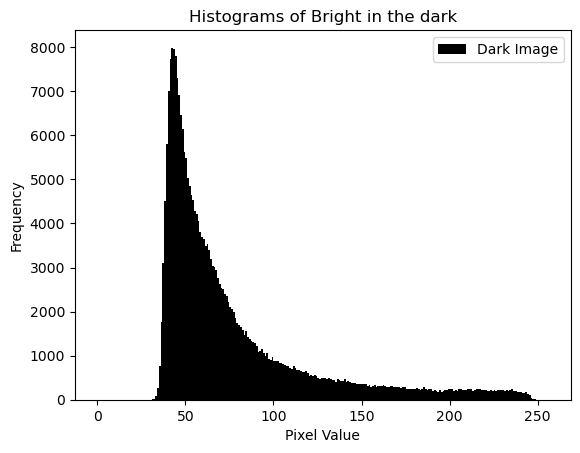

In [30]:
bright_dark_image = io.imread('data/brightinthedark.jpeg')


# Convert to grayscale
bright_dark_gray = color.rgb2gray(bright_dark_image)

# Convert to unsigned byte
bright_dark_image = img_as_ubyte(bright_dark_gray)

# Compute histograms
hist_dark, bins_dark, _ = plt.hist(bright_dark_image.flatten(), bins=256, range=[0, 256], color='black',  label='Dark Image')

# Plot histograms
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.title('Histograms of Bright in the dark')
plt.legend()
plt.show()


## Color channels

We are now going to look at the intensity values of the different channels of a color (RGB) image taken at DTU.


**Exercise 22:** *Start by reading and showing the **DTUSign1.jpg** image.*

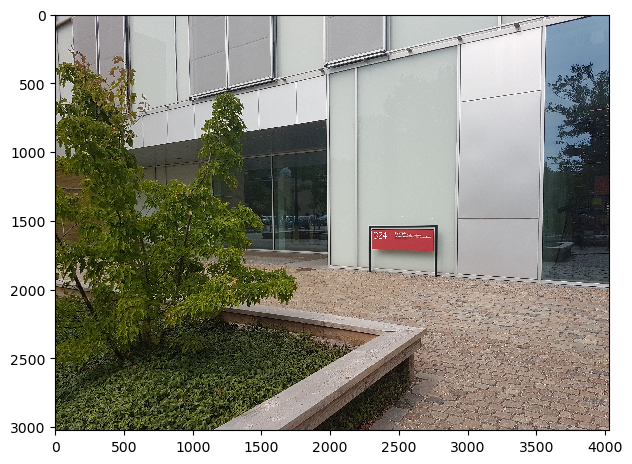

In [31]:
dtu_image= io.imread("data/DTUSign1.jpg")
io.imshow(dtu_image)

You can visualise the red (R), green and blue components of the image using:

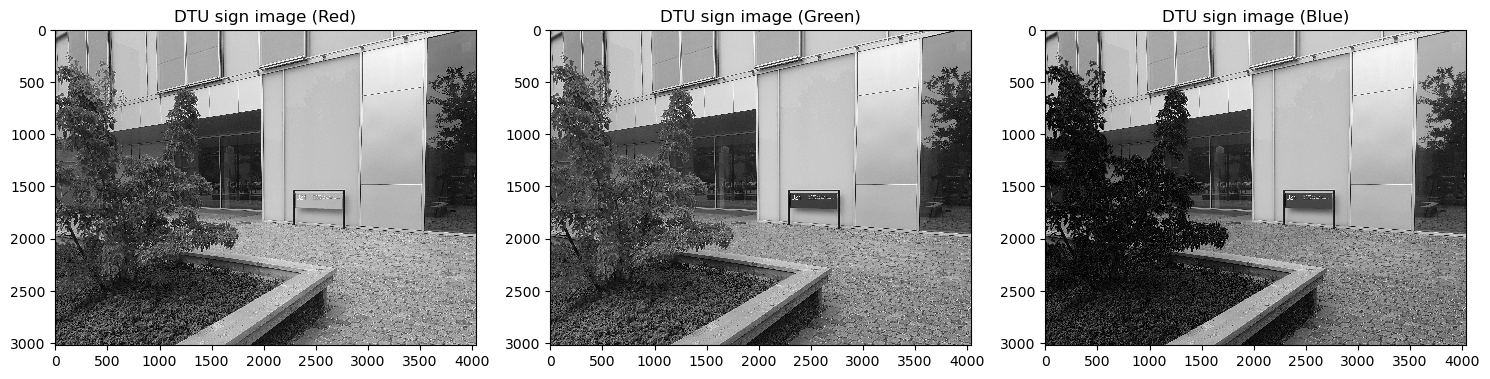

In [32]:
plt.figure(figsize=(15, 5))
r_comp = dtu_image[:, :, 0]
plt.subplot(1, 3, 1)
io.imshow(r_comp)
plt.title('DTU sign image (Red)')
#green image
g_comp = dtu_image[:, :, 1]
plt.subplot(1, 3, 2)
io.imshow(g_comp)
plt.title('DTU sign image (Green)')
#blue image
b_comp = dtu_image[:, :, 2]
plt.subplot(1, 3, 3)
io.imshow(b_comp)
plt.title('DTU sign image (Blue)')

io.show()

**Exercise 23:** *Visualize the R, G, and B components individually. Why does the DTU Compute sign look bright on the R channel image and dark on the G and B channels?  Why do the walls of the building look bright in all channels?*

DTU Compute sign looks bright on the R channel:

The red (R) channel is responsible for representing the intensity of the red color in the image.
If the DTU Compute sign has a significant amount of red color, it will appear bright in the R channel because high values in the R channel indicate high intensity of red.
DTU Compute sign looks dark on the G and B channels:

If the DTU Compute sign is not primarily composed of green or blue colors, these channels will show lower intensity values for the DTU Compute sign, making it appear dark.
Walls of the building look bright in all channels:

If the walls of the building are neutral in color (not strongly biased towards red, green, or blue), they will contribute relatively evenly to all three channels.
As a result, the walls will appear bright in all channels because they contribute to the overall brightness without any particular color bias.

## Simple Image Manipulations

**Exercise 24:** *Start by reading and showing the **DTUSign1.jpg** image.* 

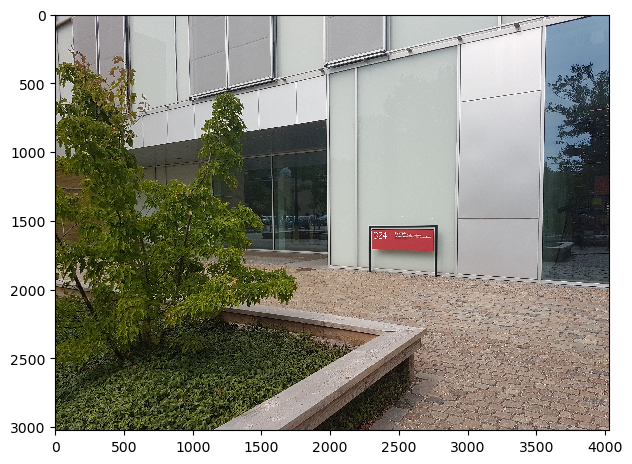

In [33]:
io.imshow(dtu_image)

You can create a black rectangle in the image, by setting all RGB channels to zero in a given region. This is also an example of using NumPy slicing:

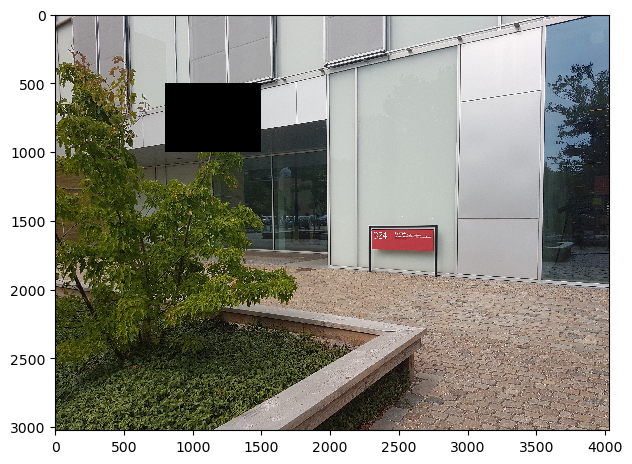

In [34]:
dtu_image[500:1000, 800:1500, :] = 0
io.imshow(dtu_image)

**Exercise 25:** *Show the image again and save it to disk as **DTUSign1-marked.jpg** using the `io.imsave` function. Try to save the image using different image formats like for example PNG.*

**Exercise 26:** *Try to create a blue rectangle around the DTU Compute sign and save the resulting image.*

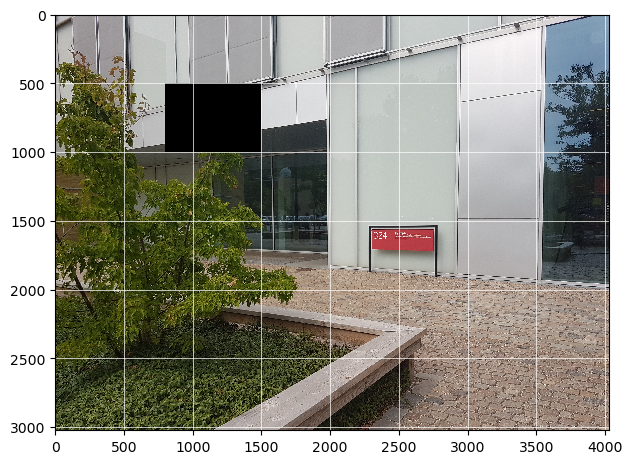

In [35]:
plt.grid(color='white', linestyle='-', linewidth=0.5)
io.imshow(dtu_image)

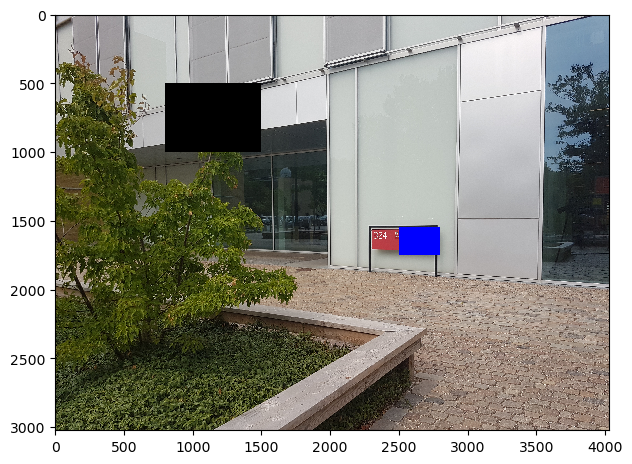

In [36]:
dtu_image[1550:1750, 2500:2800, :] = [0,0,255]
io.imshow(dtu_image)

Without using coordinates

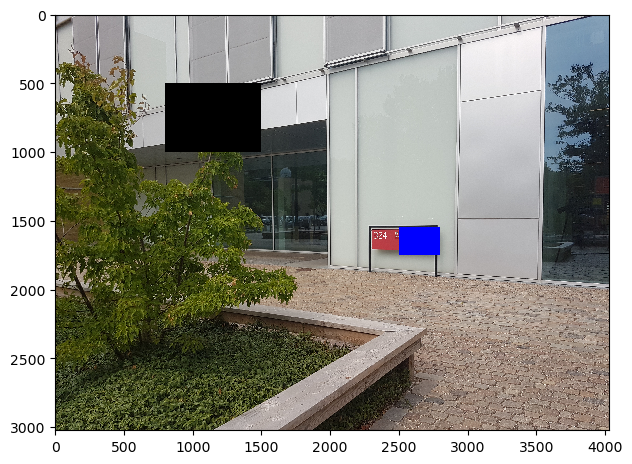

In [37]:
red_mask= r_comp >256
im_with_rectangle = np.copy(dtu_image)
im_with_rectangle[red_mask, :] = [0, 0, 255]

io.imshow(im_with_rectangle)

**Exercise 27:** *Try to automatically create an image based on **metacarpals.png** where the bones are colored blue. You should use `color.gray2rgb` and pixel masks.*


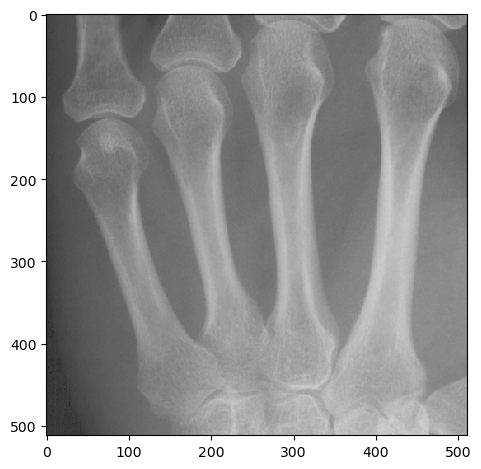

In [38]:
meta= io.imread("data/metacarpals.png")
io.imshow(meta)

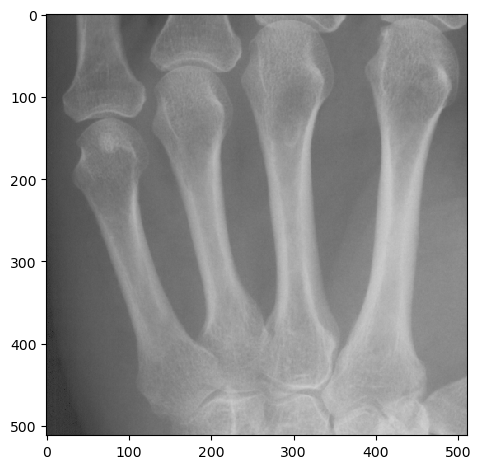

In [39]:
colored_image = color.gray2rgb(meta)
io.imshow(colored_image)

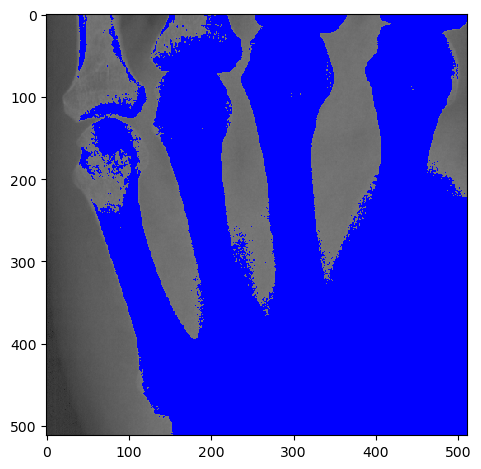

In [40]:
white_meta_mask= meta > 120
colored_image[white_meta_mask] = [0, 0, 255]

io.imshow(colored_image)


## Advanced Image Visualisation

Before implementing a fancy image analysis algorithm, it is very important to get an intuitive understanding of how the image *looks as seen from the computer*. The next set of tools can help to gain a better understanding.

In this example, we will work with an x-ray image of the human hand. Bones are hollow and we want to understand how a hollow structure looks on an image. 

Start by reading the image **metarcarpals.png**. To investigate the properties of the hollow bone, a grey-level profile can be sampled across the bone. The tool `profile_line` can be used to sample a profile across the bone:

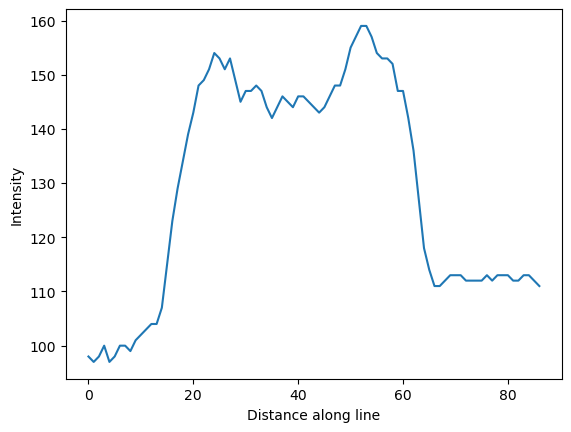

In [41]:
p = profile_line(meta, (342, 77), (320, 160))
plt.plot(p)
plt.ylabel('Intensity')
plt.xlabel('Distance along line')
plt.show()

The intensity profile represents the variation of pixel intensities along the specified line. (342, 77): The starting coordinates of the line.
(320, 160): The ending coordinates of the line.

**Exercise 28:** *What do you see - can you recognise the inner and outer borders of the bone-shell in the profile?*

An image can also be viewed as a landscape, where the height is equal to the grey level:

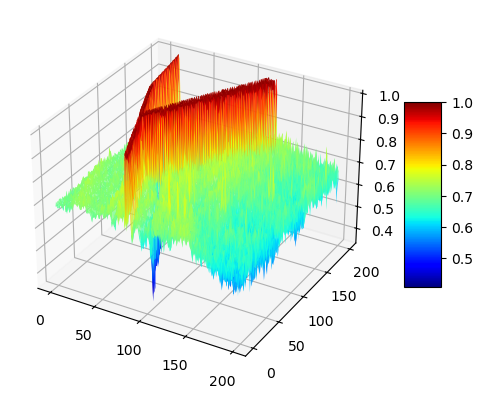

In [42]:
in_dir = "data/"
im_name = "road.png"
im_org = io.imread(in_dir + im_name)
im_gray = color.rgb2gray(im_org)
ll = 200
im_crop = im_gray[40:40 + ll, 150:150 + ll]
xx, yy = np.mgrid[0:im_crop.shape[0], 0:im_crop.shape[1]]
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(xx, yy, im_crop, rstride=1, cstride=1, cmap=plt.cm.jet,
                       linewidth=0)
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

## DICOM images

Typical images from the hospital are stored in the DICOM format. An example image from a computed tomography examination of abdominal area is used in the following.

Start by examining the header information using:

In [43]:
in_dir = "data/"
im_name = "1-442.dcm"
ds = dicom.dcmread(in_dir + im_name)
print(ds)

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 174
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: CT Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 61.7.148187188172271071649499494197343400503
(0002, 0010) Transfer Syntax UID                 UI: Implicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.40.0.13.1.1.1
(0002, 0013) Implementation Version Name         SH: 'dcm4che-1.4.34'
-------------------------------------------------
(0008, 0008) Image Type                          CS: ['DERIVED', 'SECONDARY']
(0008, 0016) SOP Class UID                       UI: CT Image Storage
(0008, 0018) SOP Instance UID                    UI: 61.7.148187188172271071649499494197343400503
(0008, 0020) Study Date                          DA: '20140914'
(0008, 0030) Study Time                          TM: ''
(0008, 0050) Accession N

**Exercise 29:** *What is the size (number of rows and columns) of the DICOM slice?*

In [44]:
rows = ds.Rows
columns = ds.Columns
print(f"The number of rows is {rows} \n" f"The number of columns is {columns} ")

The number of rows is 512 
The number of columns is 512 


This image has been **anonymized** so patient information has been removed. Else the patients name and diagnosis are sometimes also available. This makes medical images very complicated to share due to the need of protecting patient privacy.

We can get access to the pixel values of the DICOM slice by:

(512, 512)
int16


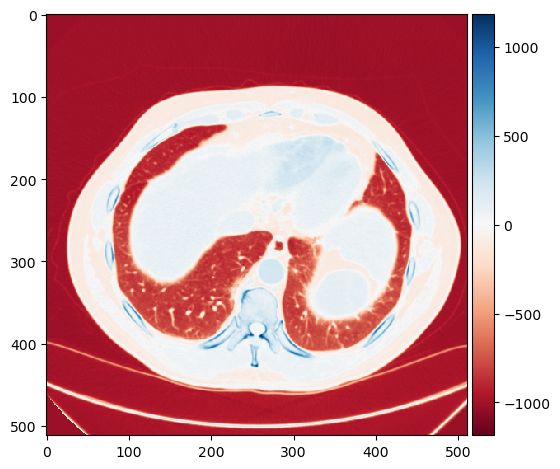

In [45]:
im = ds.pixel_array
print(im.shape)
print(im.dtype)
io.imshow(im)

We can visualize the slice using:

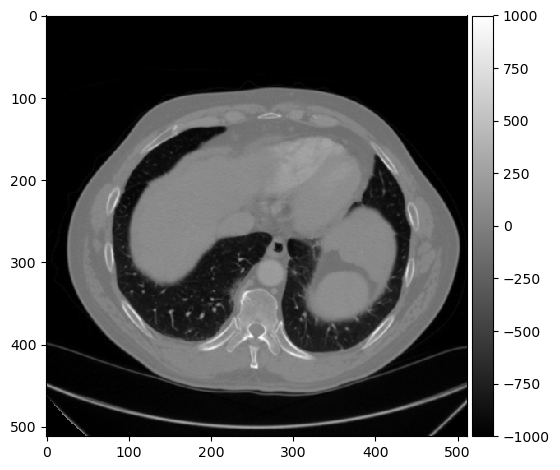

In [46]:
io.imshow(im, vmin=-1000, vmax=1000, cmap='gray')
io.show()

As can be seen, the pixel values are stored as 16 bit integers and therefore it is necessary to specify which value range that should be mapped to the gray scale spectrum (using vmin and vmax). Try to experiment with the vmin and vmax values to get the best possible contrast in the image.
